In [1]:
import numpy as np
import pandas as pd

In [2]:
# DatetimeIndex
dates = pd.date_range('2020-01-01', periods=48, freq='M')

In [4]:
# additive model : trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp * 1.1
cycle_factor = 10 * np.sin(np.linspace(0, 3.14 * 2, 48))
seasonal_factor = 7 * np.sin(np.linspace(0, 3.14 * 8, 48))
np.random.seed(2004)
irregular_factor = 2 * np.random.randn(len(dates))

In [5]:
df = pd.DataFrame({
    'timeseries' : trend_factor + cycle_factor + seasonal_factor + irregular_factor,
    'trend' : trend_factor,
    'cycle' : cycle_factor,
    'seasonal' : seasonal_factor,
    'irregular' : irregular_factor
    }, index=dates)

In [7]:
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,5.904327,1.491495


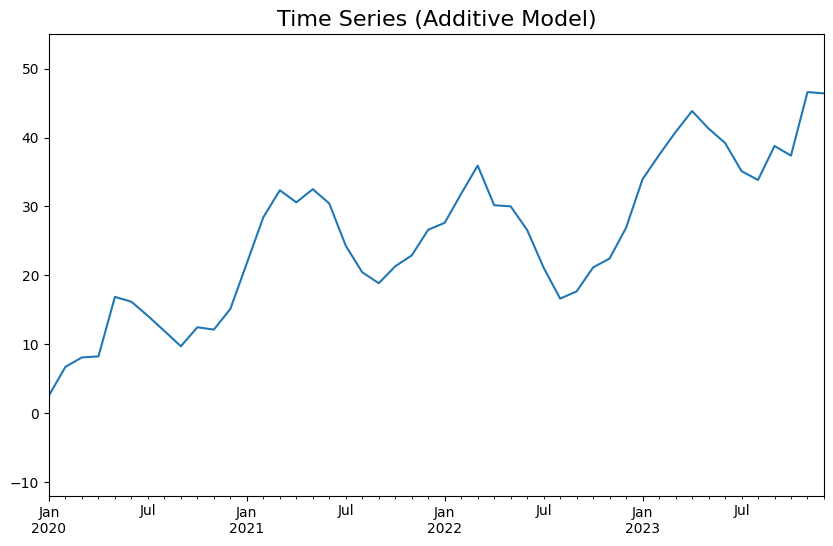

In [8]:
# Time series plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title('Time Series (Additive Model)', fontsize = 16)
plt.ylim(-12, 55)
plt.show()

> 추세변동

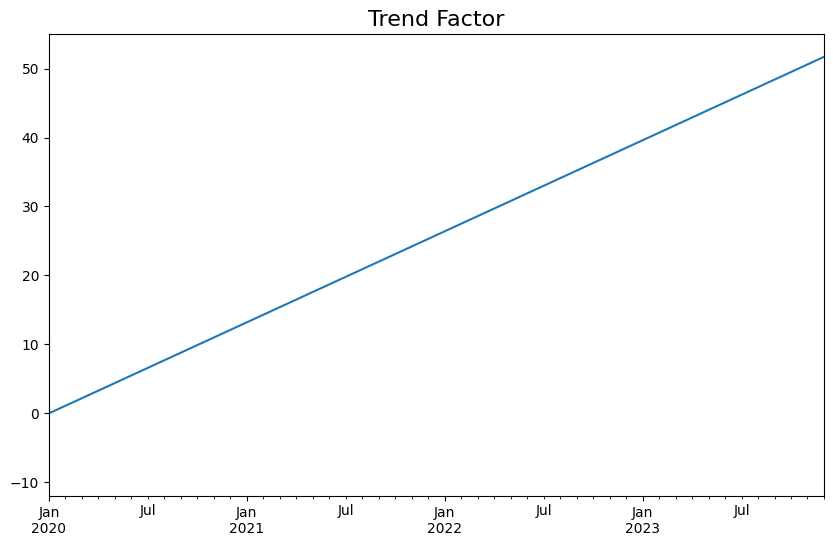

In [9]:
# --Trend variation
# timestamp = np.arnage(len(dates))
# trend_factor = timestamp * 1.1

plt.figure(figsize=[10, 6])
df.trend.plot()
plt.title('Trend Factor', fontsize = 16)
plt.ylim(-12, 55)
plt.show()

> 순환변동

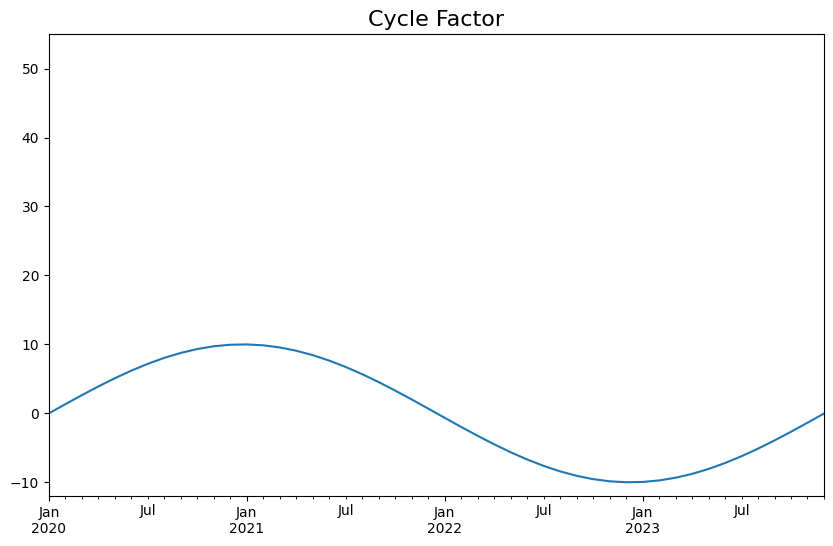

In [10]:
# 4년 주기
# --Cycle variation
# cycle_factor = 10 * np.sin(np.linspace(0, 3.14*2, 48))

plt.figure(figsize=[10, 6])
df.cycle.plot()
plt.title('Cycle Factor', fontsize = 16)
plt.ylim(-12, 55)
plt.show()

> 계절변동

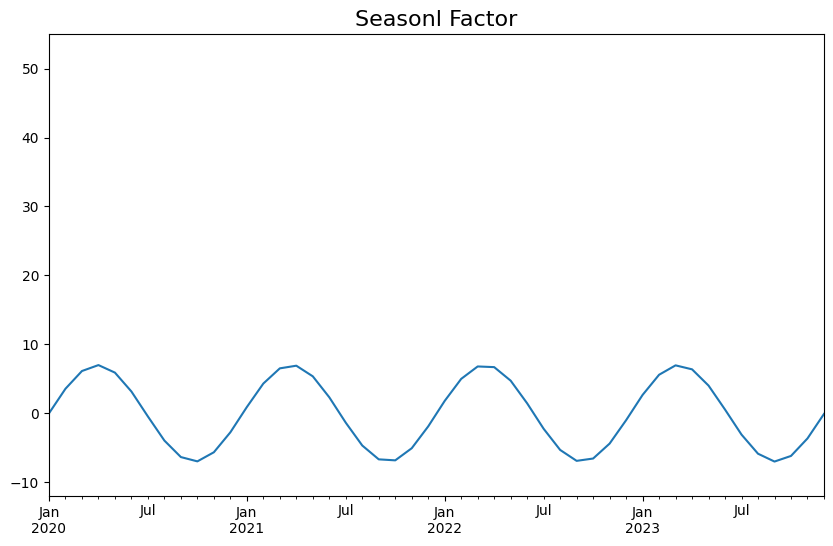

In [11]:
# -- Seasonal factor
# season_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))

plt.figure(figsize=[10, 6])
df.seasonal.plot()
plt.title('Seasonl Factor', fontsize = 16)
plt.ylim(-12, 55)
plt.show()

> 불규칙변동

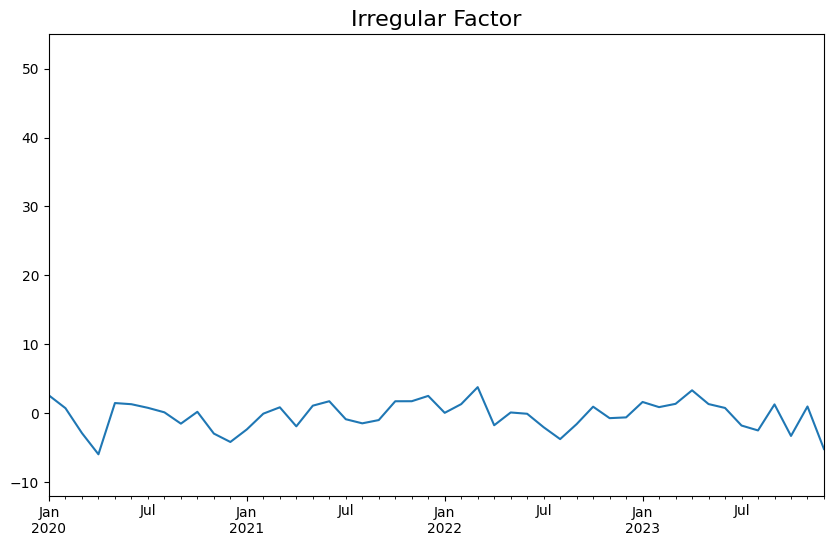

In [12]:
# -- Irregular factor
# irregular_factor = 2 * np.random.randn(len(dates))

plt.figure(figsize=[10, 6])
df.irregular.plot()
plt.title('Irregular Factor', fontsize = 16)
plt.ylim(-12, 55)
plt.show()

> 평활화 기법

In [14]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
# 2020년 8월 부터 일요일 8개를 조회
# start : 시작일, periods : 생성할 날짜의 개수, freq : 생성할 날짜의 주기
pd.date_range(start='2020-08', periods=8,freq='W')

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

데이터프레임 컬럼으로 사용했을 때와 3주치 평균 컬럼을 추가

In [16]:
df = pd.DataFrame({
    'week' : pd.date_range(start='2020-08', periods=8, freq='W'),
    'sales' : [39, 44, 40, 45, 38, 43, 39, np.nan],
    '3MA' : [0] * 8
})

# 0~2 주차 평균을 3주차에 shift 해서 적용
df['3MA'] = df[['sales']].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


Simple Moving Average를 이용한 월별 애플사 주식가격 예측

In [17]:
import FinanceDataReader as fdr

# 2020년 ~ 현재 까지의 애플 주가를 데이터프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start='2010')

# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700
2023-05-16,171.990005,173.139999,171.800003,172.070007,172.070007,42110300
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400


Text(0.5, 1.0, 'Close Price for Apple')

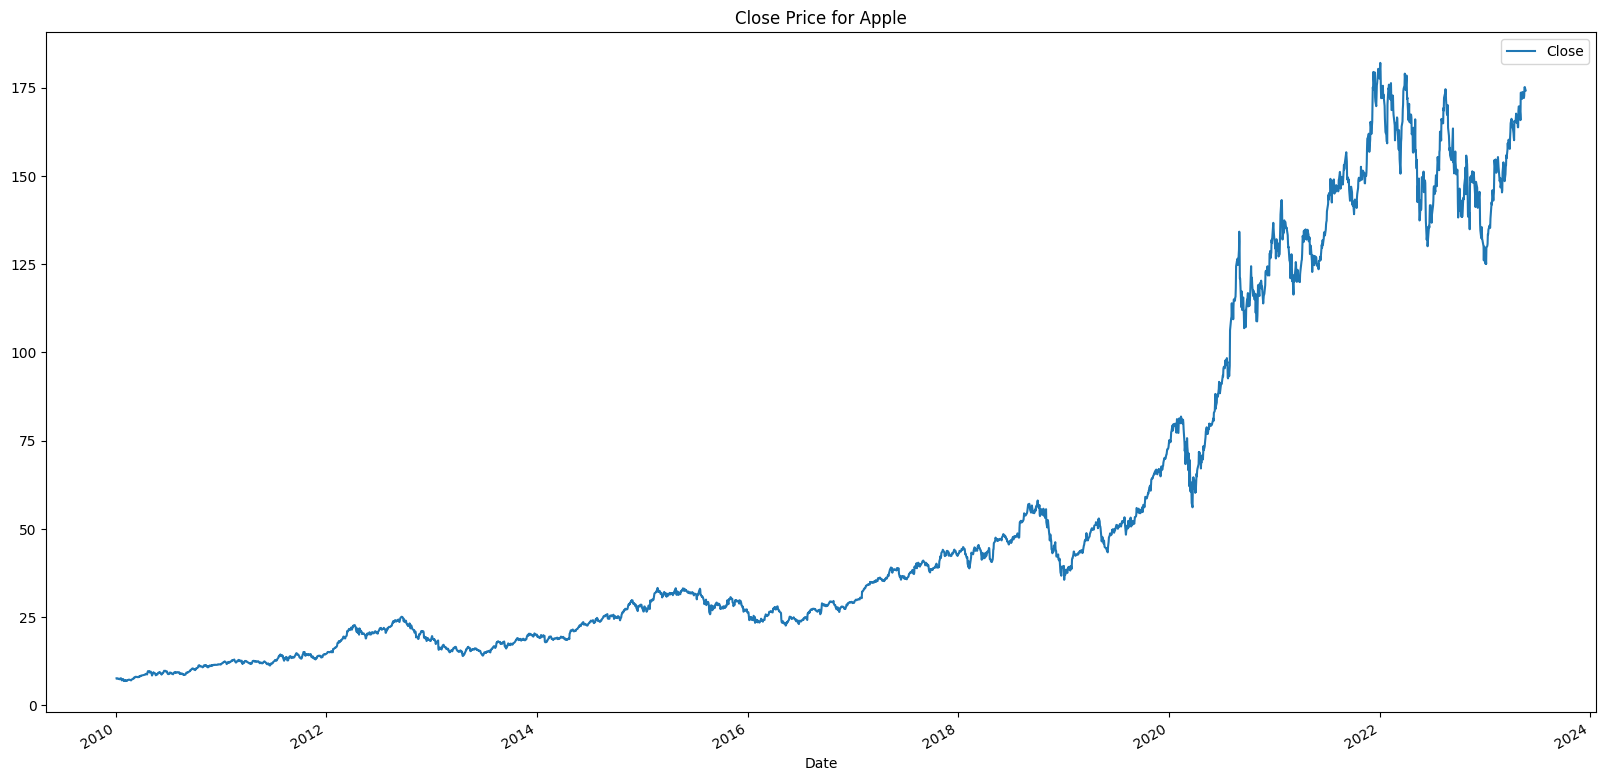

In [18]:
df_apple[['Close']].plot(figsize=(20, 10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

- 2010 ~ 2022 년까지 애플의 종가 그래프이다. 7일전 평균값을 shift 하여 이동평균 그래프를 추가
- 7일 평균값으로 부드러워진 곡선 그래프를 볼 수 있다

<Axes: xlabel='Date'>

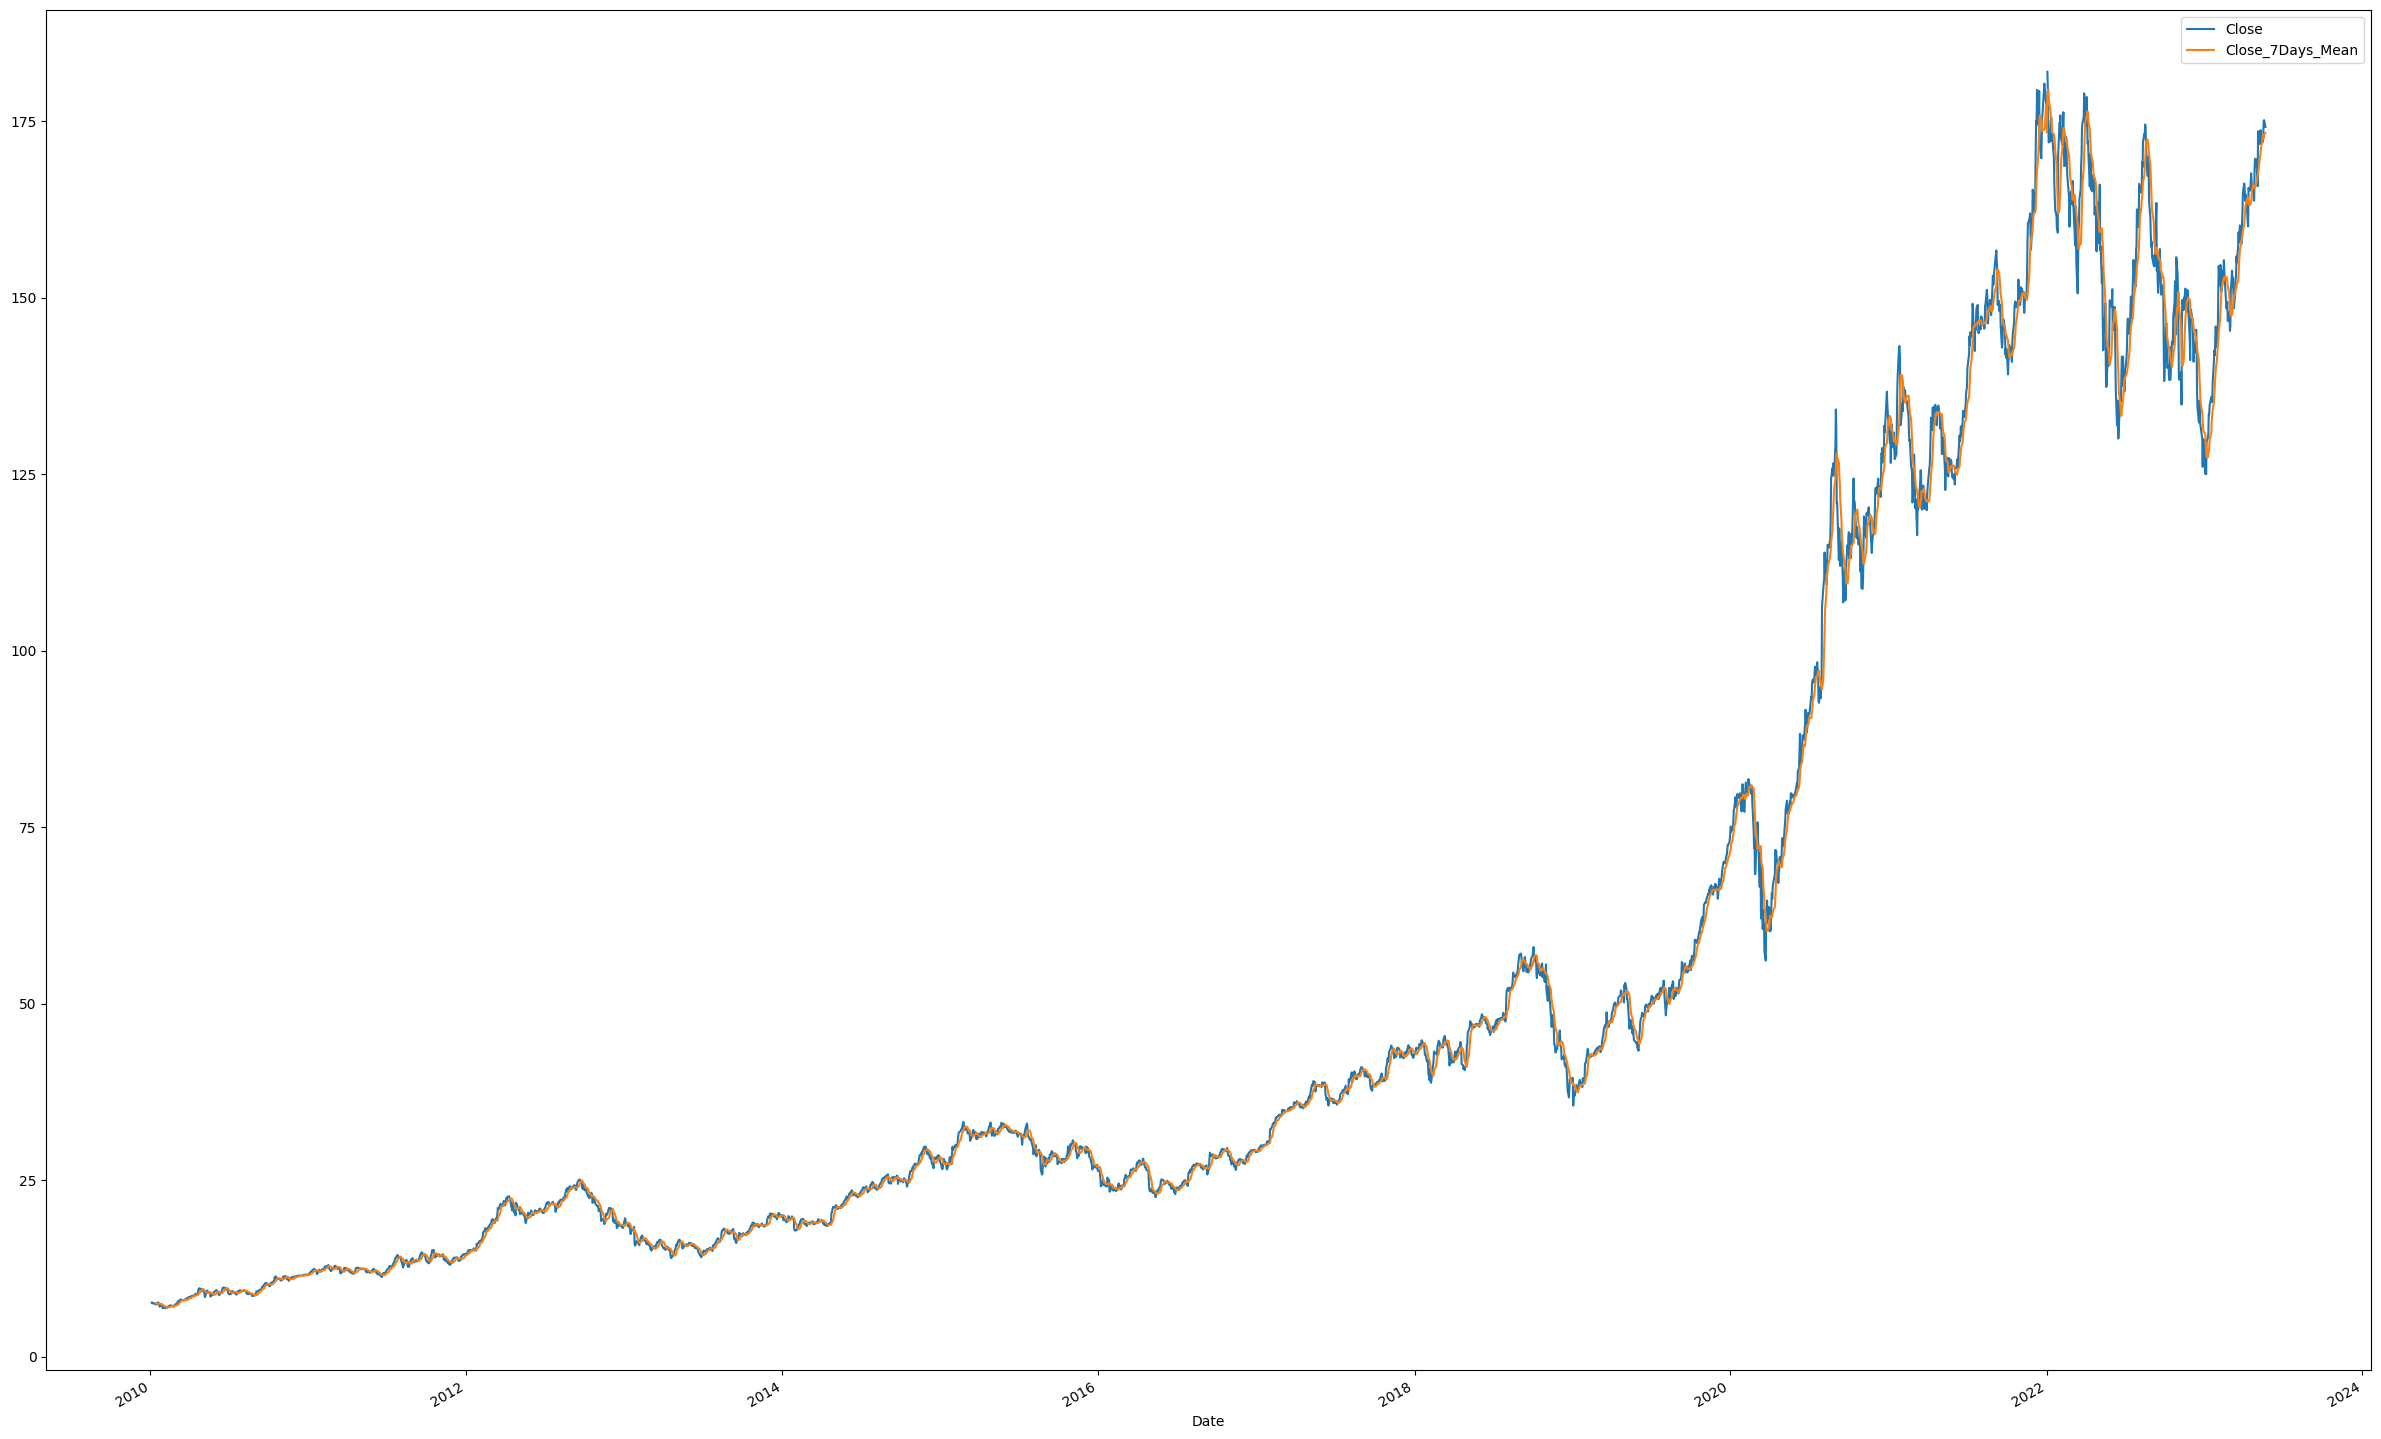

In [19]:
# 7일전 평균값 그래프 + 종가 그래프
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, 'Close'] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30, 20))

- pandas dataframe에는 resample이라는 데이터프레임의 시계열 인덱스 기준으로 샘플링을 편하게 해주는 메소드가 있다.
- 아래와 같이 하면 월단위로 시계열 데이터를 다시 만들어 준다.

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

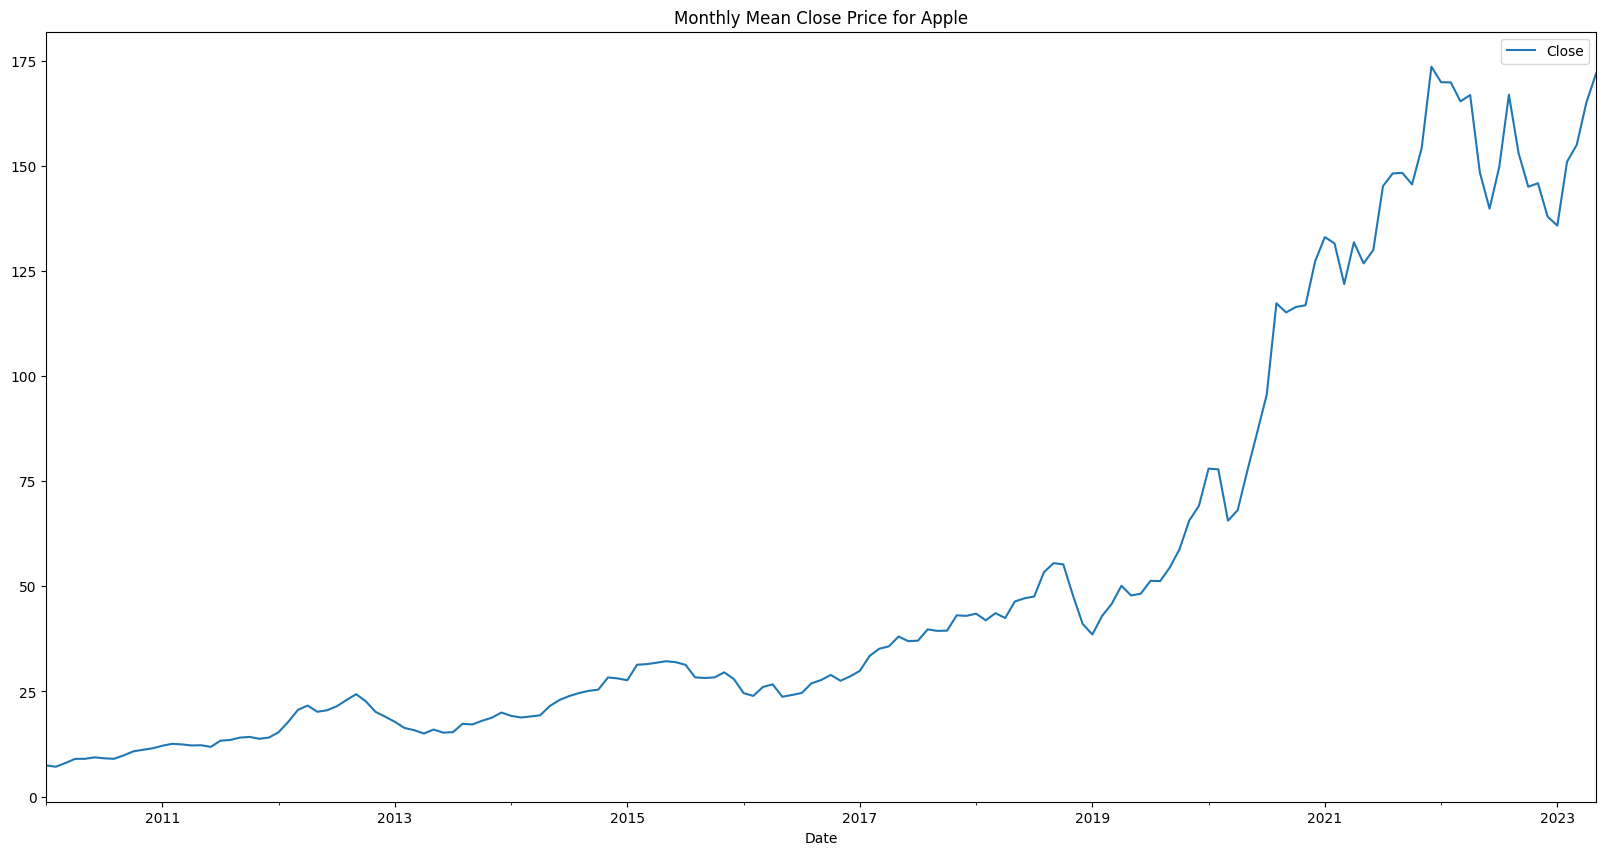

In [20]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule='M').mean()

# 마지막 컬럼(Close_7Days_Mean)제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]

# 월별 주가 (종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20, 10))
plt.title('Monthly Mean Close Price for Apple')

월단위 평균값을 또 3개월치씩 이동평균을 적용하는 코드

<Axes: xlabel='Date'>

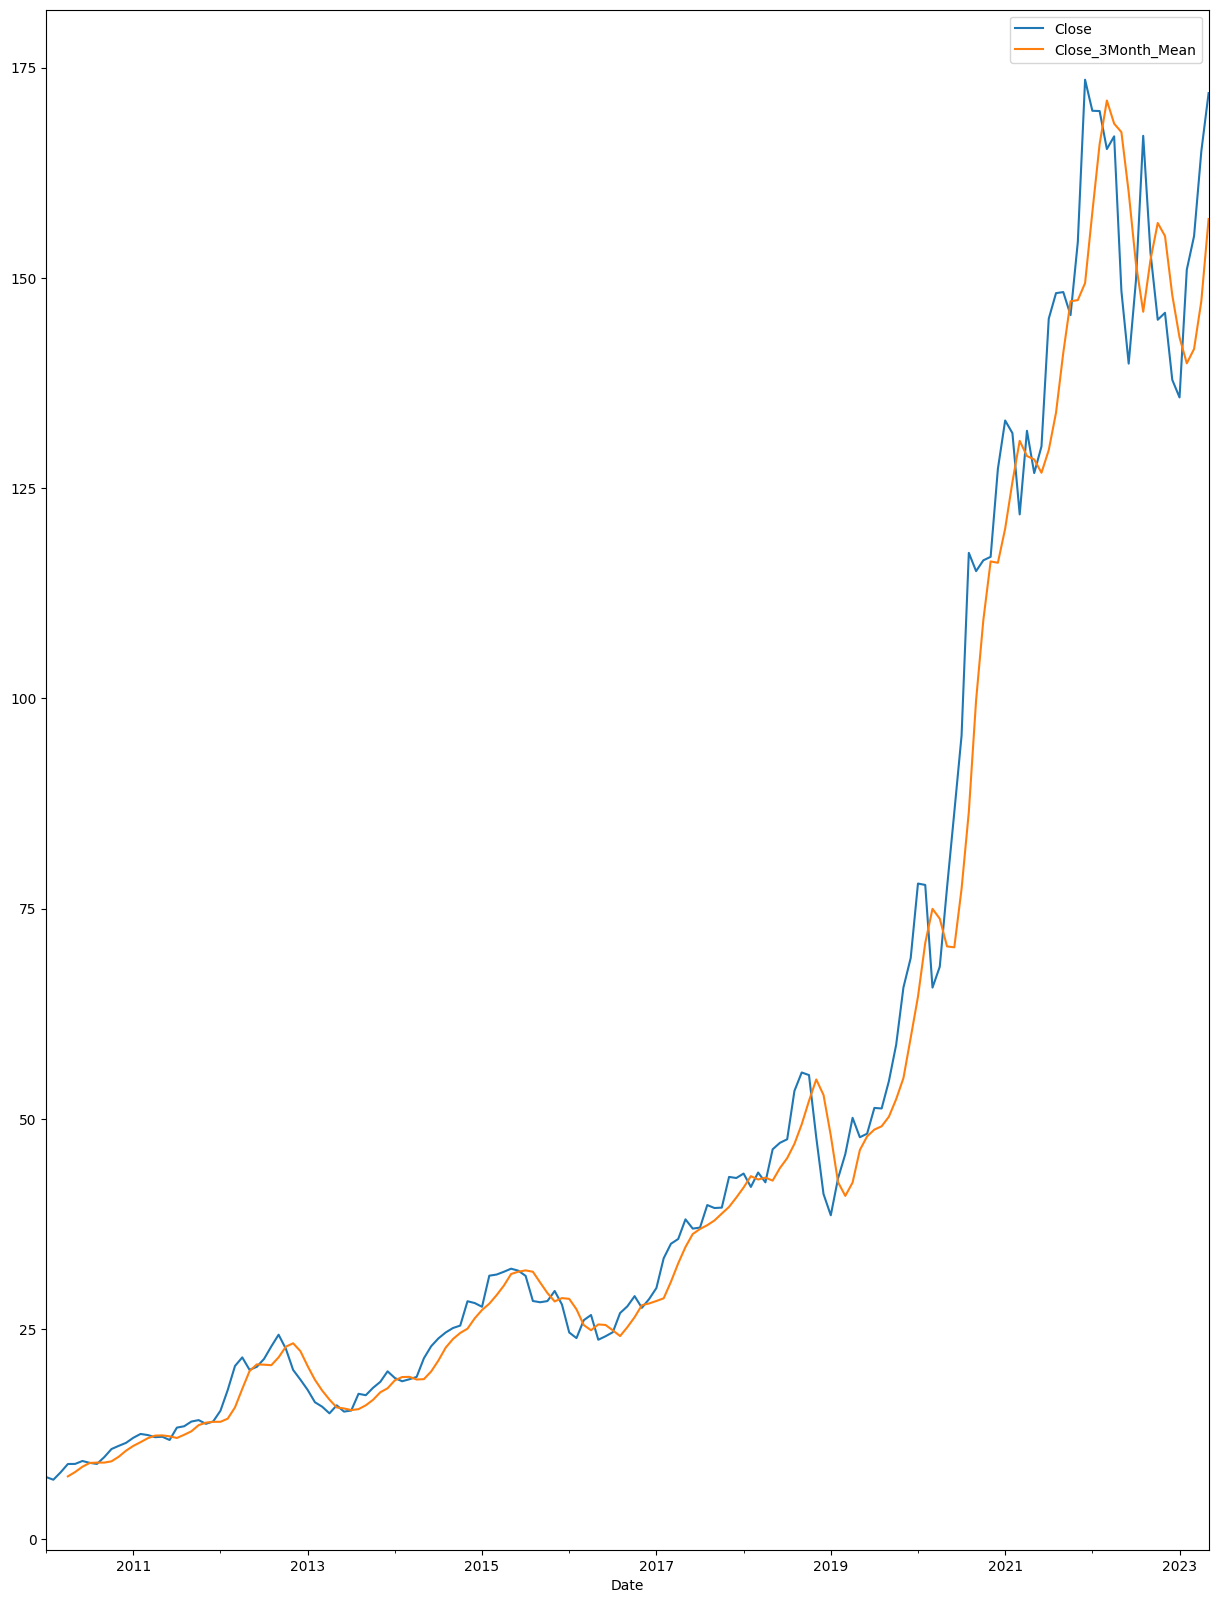

In [21]:
df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean().shift(1)
df_apple_monthly[['Close', 'Close_3Month_Mean']].plot(figsize=(15, 20))

> 지수평활화(EMA, Exponential Moving Average)
   *  최근 데이터에 가중치를 높게, 멀리 있는 데이터에 가중치 낮게 주고 평활화 하는 기법

> CMA(Cumulative Moving Average)

> 차분(differencing)

In [25]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

## getting drug sales dataset
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


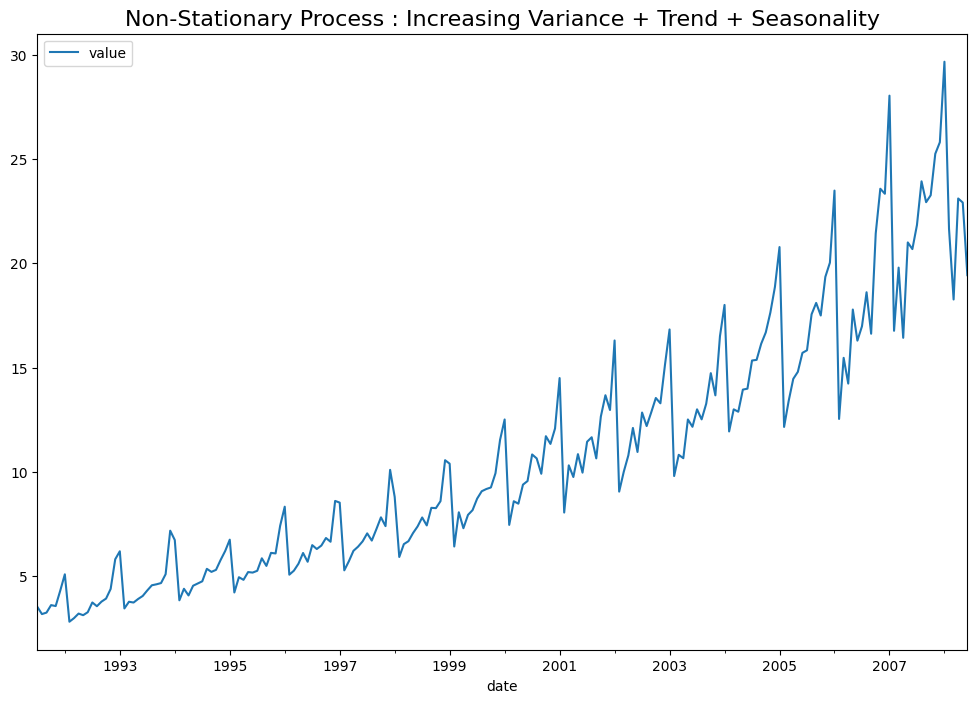

In [26]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process : Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

위의 시계열 그래프에서 볼 수 있는 것처럼, (a) 분산이 시간의 흐름에 따라 증가하고 (분산이 고정이 아님), (b) 추세(trend)가 있으며, (c) 1년 주기의 계절성 (seasonality)이 있으므로, 비정상확률과정(non-stationary process)이다.

In [27]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

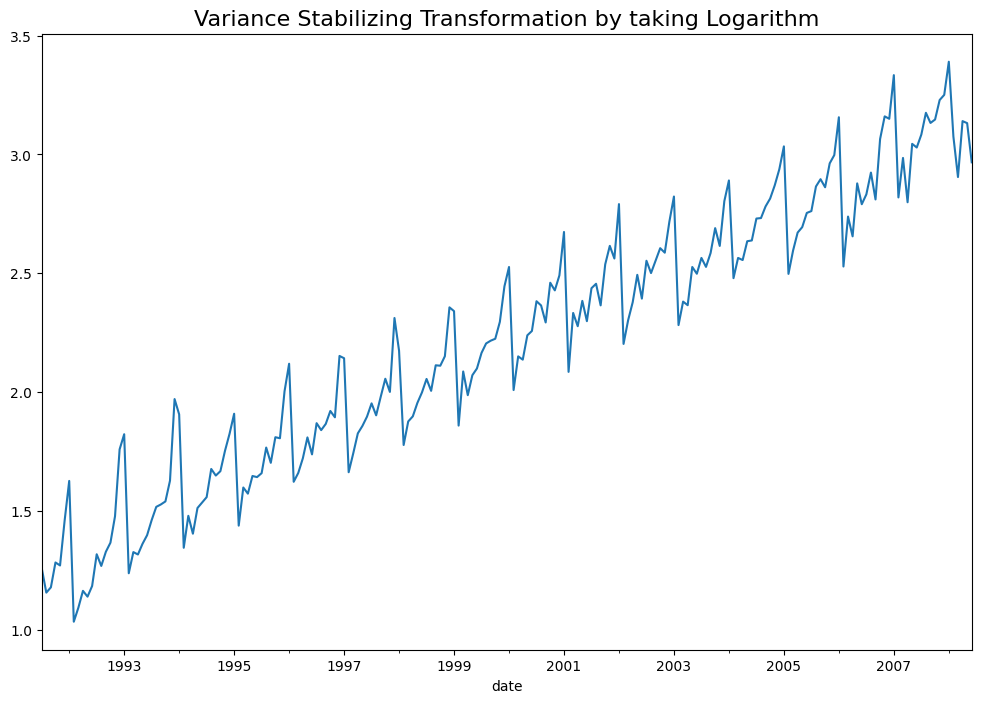

In [28]:
## plotting
df_vst.plot(figsize=(12, 8))
plt.title('Variance Stabilizing Transformation by taking Logarithm', fontsize=16)
plt.show()

* 추세가 있는 경우 차분을 통한 추세 제거 (de-trend by differencing)
* 차분(differencing)은 현재의 시계열 값에서 시차 t 만큼의 이전 값을 빼주는 것이다
* Python의 diff() 메소드를 사용해서 차분을 해줄 수 있다
* 이때 차분의 차수만큼 결측값이 발생 -> dropna() 메소드 사용해서 결측값 제거

In [29]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1

date
1991-08-01   -0.103170
1991-09-01    0.022177
1991-10-01    0.104647
1991-11-01   -0.012578
1991-12-01    0.188688
                ...   
2008-02-01   -0.314777
2008-03-01   -0.170220
2008-04-01    0.235181
2008-05-01   -0.008482
2008-06-01   -0.164775
Name: value, Length: 203, dtype: float64

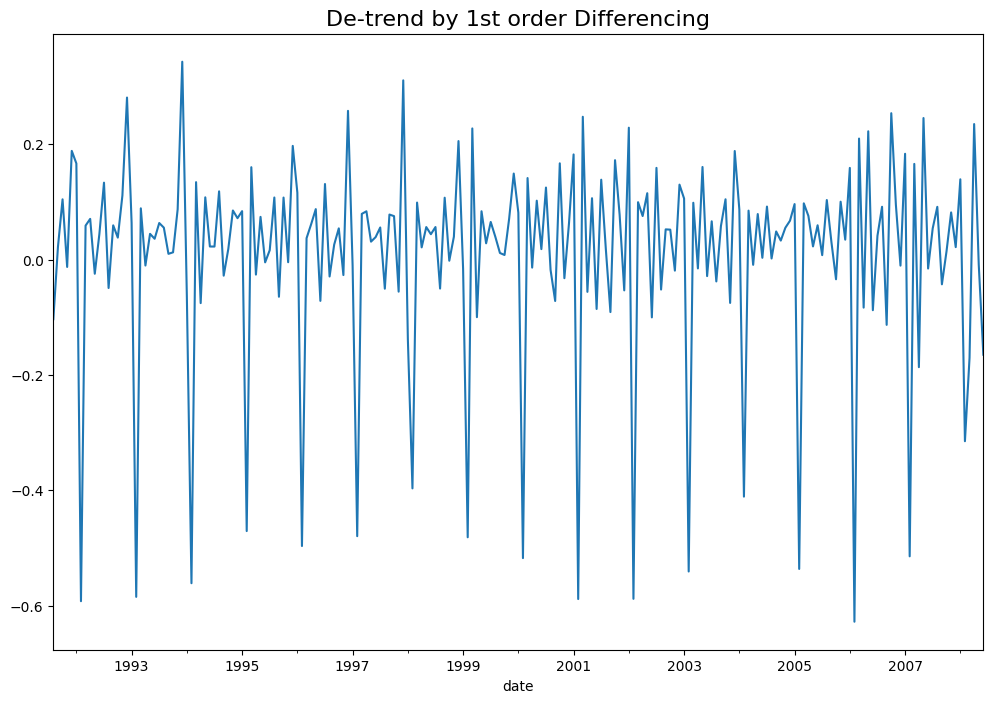

In [30]:
plt.figure(figsize=(12, 8))
df_vst_diff1.plot()

plt.title('De-trend by 1st order Differencing', fontsize=16)
plt.show()

* 계절성이 있는 경우 계절 차분을 통한 계절성 제거 (de-seasonality by seasonal differencing)
* 아직 남아있는 계절성(seasonality)을 계절 차분(seasonal differencing)을 사용해서 제거
* 1년 12개월 주기의 계절성을 띄고 있으므로 diff(12) 함수로 계절 차분을 실시하고, 12개의 결측값만큼 dropna()

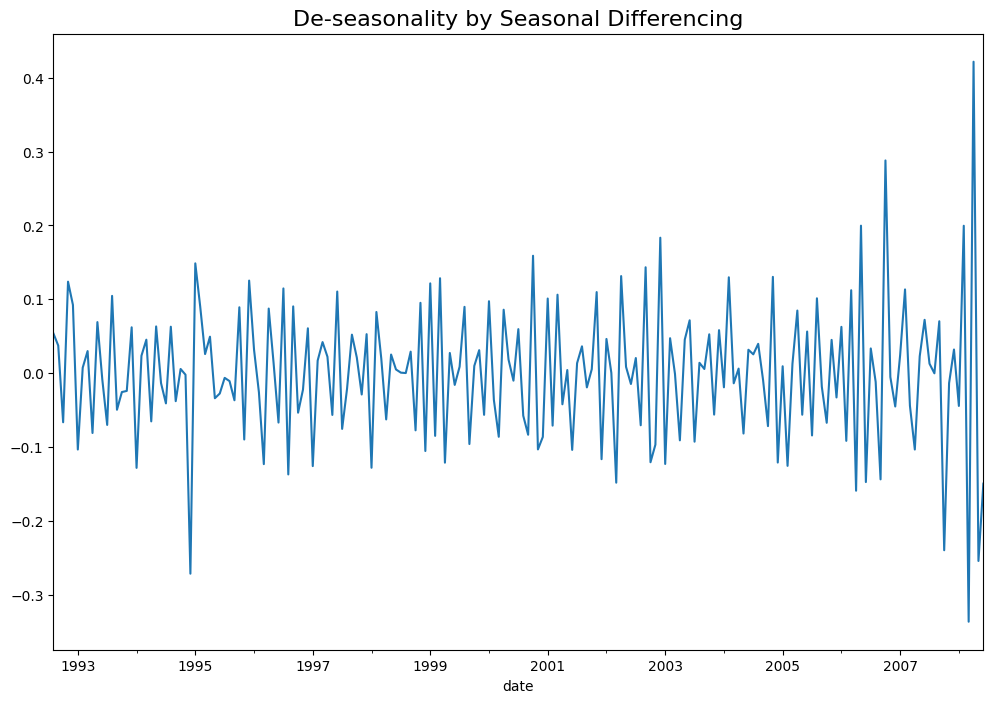

In [31]:
## Stationary Process : De-seasonality by Seasonal Differencing
df_vst_diff12 = df_vst_diff1.diff(12).dropna()

## plotting
plt.figure(figsize=(12, 8))
df_vst_diff12.plot()
plt.title('De-seasonality by Seasonal Differencing', fontsize=16)
plt.show()

비정상 시계열 (non-stationary process) 데이터
1. log transformation을 통한 분산 안정화
2. 차분(differencing)을 통한 추세 제거
3. 계절 차분 (seasonal differencing)을 통한 계절성 제거를 모두 마쳐서 정상 시계열 (stationary process)로 변환